In [7]:
%cd
  
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools

%cd ~/models/research
!protoc object_detection/protos/*.proto --python_out=.
!python setup.py install

%cd ~/models/research/slim
!python setup.py install


import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

%cd ~/models/research
!python object_detection/builders/model_builder_test.py

/root
fatal: destination path 'models' already exists and is not an empty directory.
/root/models/research
running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying object_detection/protos/region_similarity_calculator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/mean_stddev_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/post_processing_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/optimizer_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_gener

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
%cd /root/models/research

!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

/root/models/research


In [19]:
%cd /root/models/research/slim

!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim
!python setup.py install

/root/models/research/slim
running install
running bdist_egg
running egg_info
writing slim.egg-info/PKG-INFO
writing dependency_links to slim.egg-info/dependency_links.txt
writing top-level names to slim.egg-info/top_level.txt
writing manifest file 'slim.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/preprocessing
copying build/lib/preprocessing/__init__.py -> build/bdist.linux-x86_64/egg/preprocessing
copying build/lib/preprocessing/preprocessing_factory.py -> build/bdist.linux-x86_64/egg/preprocessing
copying build/lib/preprocessing/lenet_preprocessing.py -> build/bdist.linux-x86_64/egg/preprocessing
copying build/lib/preprocessing/cifarnet_preprocessing.py -> build/bdist.linux-x86_64/egg/preprocessing
copying build/lib/preprocessing/inception_preprocessing.py -> build/bdist.linux-x86_64/egg/preprocessing
copying build/lib/preprocessing/vgg_p

In [23]:
%cd /content/drive/My Drive/Rapidops

/content/drive/My Drive/Rapidops


In [38]:
!python3 generate_tfrecord.py --csv_input=data/train_labels.csv --output_path=data/train.record --image_dir=images/train

W0619 13:16:17.945948 140520426706816 deprecation_wrapper.py:119] From generate_tfrecord.py:101: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0619 13:16:17.946780 140520426706816 deprecation_wrapper.py:119] From generate_tfrecord.py:87: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

W0619 13:16:17.996639 140520426706816 deprecation_wrapper.py:119] From generate_tfrecord.py:46: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/drive/My Drive/Rapidops/data/train.record


In [39]:
!python3 generate_tfrecord.py --csv_input=data/test_labels.csv --output_path=data/test.record --image_dir=images/test

W0619 13:16:27.293751 140321809287040 deprecation_wrapper.py:119] From generate_tfrecord.py:101: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0619 13:16:27.294534 140321809287040 deprecation_wrapper.py:119] From generate_tfrecord.py:87: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

W0619 13:16:27.313223 140321809287040 deprecation_wrapper.py:119] From generate_tfrecord.py:46: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/drive/My Drive/Rapidops/data/test.record


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_labels.csv to test_labels.csv
Saving train_labels.csv to train_labels.csv
User uploaded file "test_labels.csv" with length 368 bytes
User uploaded file "train_labels.csv" with length 6047 bytes


In [33]:
%cd /content/drive/My Drive/Rapidops
import os
import shutil
import glob
import urllib.request
import tarfile

MODEL = 'faster_rcnn_resnet50_coco_2018_01_28'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

if not (os.path.exists(MODEL_FILE)):
  opener = urllib.request.URLopener()
  opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/content/drive/My Drive/Rapidops


In [40]:
%cd /content/drive/My Drive/Rapidops

!python ~/models/research/object_detection/model_main.py \
    --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_resnet50_coco.config \
    --model_dir=/training/ \
    --alsologtostderr \
    --num_train_steps=200 \
    --num_eval_steps=50

/content/drive/My Drive/Rapidops
W0619 13:17:03.507708 140430497986432 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0619 13:17:03.543377 140430497986432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/slim-0.1-py3.6.egg/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0619 13:17:03.597199 140430497986432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/slim-0.1-py3.6.egg/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0619 13:17:03.615297 140430497986432 deprecation_wrapper.py:11

KeyboardInterrupt: ignored

In [41]:
!python3 ~/models/research/object_detection/legacy/train.py \
    --train_dir=training/ \
    --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_resnet50_coco.config \
    --logtostderr

W0619 13:39:12.248249 139807858898816 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0619 13:39:12.431069 139807858898816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/slim-0.1-py3.6.egg/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0619 13:39:12.491373 139807858898816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/slim-0.1-py3.6.egg/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0619 13:39:12.513747 139807858898816 deprecation_wrapper.py:119] From /root/models/research/obj

In [46]:
pwd

'/content/drive/My Drive/Rapidops'

In [48]:
!tensorboard --logdir=/training/

W0619 17:07:06.878612 139903428085504 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensorboard/backend/event_processing/event_file_loader.py:40: The name tf.errors.raise_exception_on_not_ok_status is deprecated. Please use tf.compat.v1.errors.raise_exception_on_not_ok_status instead.

Exception in thread Reloader:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tensorboard/backend/application.py", line 391, in _reload
    multiplexer.Reload()
  File "/usr/local/lib/python2.7/dist-packages/tensorboard/backend/event_processing/plugin_event_multiplexer.py", line 240, in Reload
    Worker()
  File "/usr/local/lib/python2.7/dist-packages/tensorboard/backend/event_processing/plugin_event_multiplexer.py", line 218, in Worker
    accumulator

KeyboardInterrupt: ignored

In [49]:
!python3 ~/models/research/object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path /root/models/research/object_detection/samples/configs/faster_rcnn_resnet50_coco.config \
    --trained_checkpoint_prefix training/model.ckpt-406 \
    --output_directory bottle_inference_graph

W0619 17:19:42.316958 139908103063424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/slim-0.1-py3.6.egg/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0619 17:19:42.377723 139908103063424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/slim-0.1-py3.6.egg/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0619 17:19:42.397502 139908103063424 deprecation_wrapper.py:119] From /root/models/research/object_detection/export_inference_graph.py:156: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0619 17:19:42.398469 139908103063424 deprecation_wrapper.py:119] From /root/models/research/object_detection/export_inference_graph.py:139: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0619 17:19:42.406733 139908103063424 deprecation_wrapper.py:119] From /usr/local

/root/models/research/object_detection
/content/drive/My Drive/Rapidops


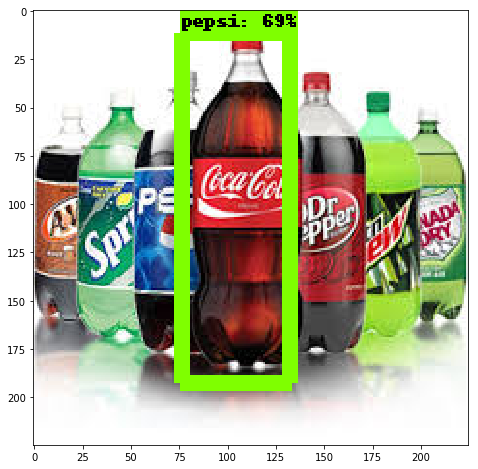

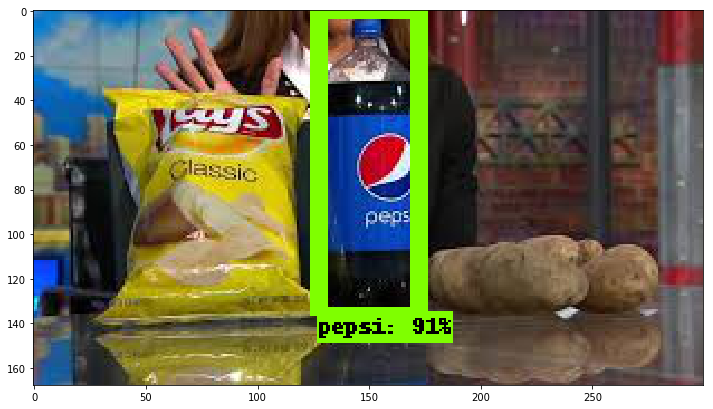

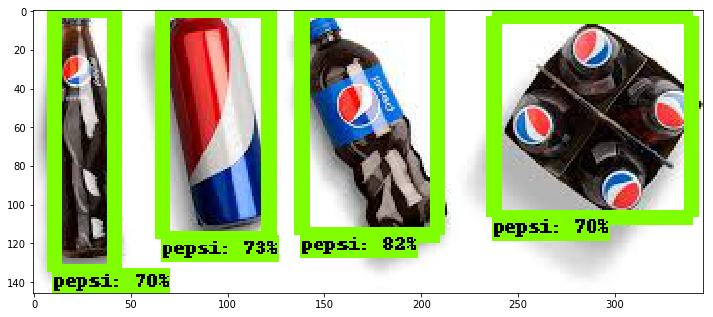

In [4]:
%cd ~/models/research/object_detection




import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.12.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')
  

  
  
# This is needed to display the images.
%matplotlib inline




from utils import label_map_util

from utils import visualization_utils as vis_util


%cd /content/drive/My Drive/Rapidops
# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = 'bottle_inference_graph' + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'label_map.pbtxt')

NUM_CLASSES = 3




detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
    
    
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'test{}.jpg'.format(i)) for i in range(6, 9) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)




def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict




for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)